# RNA Sequencing Through Expectation Maximization

### Introduction

A classic problem from computational biology is that RNA sequencing. RNA transcripts consist of nucleotides (A, G, C, and T) that contain instructions for making proteins in organisms. In this problem, we want to estimate how many of each type of RNA transcript is present in a given cell. [High through sequencing methods](https://en.wikipedia.org/wiki/DNA_sequencing#High-throughput_methods) provide data containing _reads_, which are short, randomly sampled bits of the RNA sequence. By observing the reads, we wish to estimate the distribution of transcripts in the cell, i.e. the fraction of each read to the total number of reads.

We'll consider the following problem, simplified considerably from reality. We have a set of RNA transcripts that we know the sequense of. We take a number of reads from a cell, which are randomly selected segments of known length from any of the available RNA. We sequence the reads and match them to the full transcripts, allowing us to estimate the distribution of transcripts. If every read was uniquely associated with a single transcript, this would be a fair easy prolem. Instead, our problem is complicated by the fact that individual reads could come from multiple transcripts. In other words, there is _ambiguity_ to the reads, as illustrated in the following figure:

![transcripts](imgs/rna1.png)

For instance, "Read 1" might be the sequence `AGACT`, which is present on all three transcripts illustrated here.

Now to formalize the problem. We assume that there are $m$ transcripts each of length $\ell_t$, and we take $n$ reads each of length $\ell_r$. Additionally, we assume that within the cell we are testing, the probability of selecting transcript $t$ is $\rho_t$ for $t=1,\ldots,m$. For this to be a valid probability distribution, it must be the case that

$$\sum_{t=1}^{m} \rho_t = 1$$.

We use the notation that the $i^{\text{th}}$ read comes from a randomly chosen transcript $T_i$, following the distribution $\rho_1,\ldots,\rho_m$. Each read can come from a random position within the selected transcript. The number of possible starting positions within a given transcript is

$$\ell = \ell_t - \ell_r + 1$$.

So, given a set of reads $\left\{R_1,\ldots,R_n\right\}$ (which we assume to be independent), we estimate the distribution $\rho_1,\ldots,\rho_m$ that is most likely to result in the observed reads. We do this by maximizing the following likelihood function:

$$L\left(\rho_1,\ldots,\rho_m\right) = \prod_{i=1}^n P\left(R_i=r_i;\rho_1,\ldots,\rho_m\right)$$

We assume that...

1. The sequence of nucleotides (A, G, C, T) in each transcipt is known.
2. Each read can only come from at most one location in a transcript.

### Solving a simplier problem first

As a warmup, let's consider the case that there is _not_ ambiguity in the reads. That is, every read can only come from one single transcript, as in the following figure:

![transcripts](imgs/rna2.png)

Consider the following: What is the probability that the $i^{\text{th}}$ observed read $R_i$ is a particular sequence $r_i$? In other words, what is $P(R_i=r_i)$? Let $t_i$ be the transcript where sequence $r_i$ occurs, where $t_i\in\left\{1,2,\ldots,m\right\}$. By the law of total probability, 

$$
P(R_i=r_i) = \sum_{j=1}^m P(R_i=r_i \cap T_i=j)
$$

However, we know that each sequence can only occur on one transcript so $P(R_i=r_i \cap T_i=j)=0$ when $j \neq t_i$. So, that eleminates all but one term in the sum. Then, we apply the definition of conditional probability as follows:

$$
\begin{align}
P(R_i=r_i) &= \sum_{j=1}^m P(R_i=r_i \cap T_i=j) \\
&= P(R_i=r_i \cap T_i=t_i) \\
&= P(R_i=r_i \mid T_i=t_i)P(T_i=t_i)
\end{align}
$$

The first term is the conditional probability that $r_i$ is observed, given that transcript $t_i$ was selected. This is straightforward. As previously mentioned, there are $\ell = \ell_t - \ell_r + 1$ possible starting positions within a transcript. Only one of them will result in the observe sequence, so

$$
P(R_i=r_i \mid T_i=t_i) = \frac{1}{\ell_t - \ell_r + 1} = \frac{1}{\ell}.
$$

Additonally, the second term is the probability of selecting that particular transcript, so

$$
P(T_i=t_i) = \rho_{t_i}.
$$

Bringing this all together, we have:

$$
P(R_i=r_i) = \frac{\rho_{t_i}}{\ell}
$$

Okay! Now let's do a sanity check. Let's suppose that there are only two possible transcript. What is the maximum likelihood estimate (MLE) of $\rho_1$ and $\rho_2$, assuming that we observe $k$ reads compatible with transcript 1 and $n-k$ reads compatible with transcript 2?


Let's start by forming the maximum likelihood equation.

$$
\begin{align}
L(\rho_1, \rho_2) &= \prod_{i=1}^{n}{  P(R_i=r_i;\rho_1, \rho_2)  } \\
&= \left(\frac{\rho_{1}}{\ell_t - \ell_r +1}\right)^k \left(\frac{\rho_{2}}{\ell_t - \ell_r +1}\right)^{n-k} \\ 
&= \frac{\rho_{1}^k \rho_{2}^{n-k}}{\left(\ell_t - \ell_r +1\right)^n}
\end{align}
$$

Where,

$$\ell = \ell_t - \ell_r +1$$

We can see that $L$ is maximized when its numerator is maximized:

$$\max_{\rho_1}L=\max_{\rho_1}\rho_{1}^k \left(1-\rho_{1}\right)^{n-k}$$

Take the derivative with respect to $\rho_1$ and set equal to zero:

$$\frac{d}{d \rho_1} \left(\rho_{1}^k \left(1-\rho_{1}\right)^{n-k} \right)= (k-n\rho_1) \rho_1^{k-1}\left(1-\rho_{1}\right)^{n-k-1}=0$$

The solutions for the above equation are

$$\rho_1 = 0, 1, \frac{k}{n}$$

And $L$ is maximized for $\rho_1=\frac{k}{n}$. 

So, 

$$\begin{align}\hat{\rho}_1 &= \frac{k}{n} \\ \hat{\rho}_2 &= 1 - \frac{k}{n} = \frac{n - k}{n} \end{align}$$

So, in the simple case that we have two transcripts and no ambiguity in reads, the MLE of the distribution is simply the fraction of observed reads compatible with the given transcript.

By following this pattern (and leaving the rigorous proof to the reader), we can expand this to the case of $m$ transcripts (still with no ambiguity). Assuming that out of $n$ reads, $k_i$ reads are compatible with transcript $i$, such that $\sum_{i=1}^{m}{k_i} = n$, the maximum likelihood estimator of $\rho_1,\ldots,\rho_m$ is

$$
\hat{\rho}_i = \frac{k_i}{n},\quad\quad\text{for }i=1,\ldots,m.
$$

Okay, that was a good warm-up. Now on to the real problem...

### Modeling the problem with ambiguity

Now, we return to the case that an observable sequence can be present in multiple transcripts. We still assume that each read can occur in at most one location on a transcript. We'll encode the information about what reads can occur in what transcripts in a _compatibility matrix_, $A$, where entry $A_{ij}$ is 1 if read $r_i$ can occur in transcript $j$ and 0 otherwise. An example is given below.

$$
A = \left[ \begin{matrix} 1 & 1 & 1 \\ 0 & 1 & 1 \\ 1 & 0 & 1 \\ 1 & 0 & 0 \\ 1 & 1 & 0 \end{matrix}\right]
$$

![transcripts](imgs/rna1.png)

So, given an arbitrary compatibility matrix, what is the maximum likelihood expression for $\rho_1,\ldots,\rho_m$? As before, we want to consider the probability of observing a specific read, given a distribution of $\rho$'s.

$$P(R_i=r_i;\rho_1, \ldots, \rho_m) = \sum_{j=1}^m P(R_i=r_i \cap T_i=j)$$

However, this time, $r_i$ can be associated with multiple possible transcripts, so the sum does not collapse. Instead, we sum over the rows of $A$.

$$P(R_i=r_i;\rho_1, \ldots, \rho_m) = \sum_{j=1}^m A_{ij} P(R_i=r_i \cap T_i=j) $$

Lets, define the vector $\rho$: 

$$\rho = \left[ \begin{matrix} \rho_1 \\ \vdots \\ \rho_m \end{matrix} \right]$$

Which allows us to put the probability of observing $r_i$ in compact form:

$$\begin{align}P(R_i=r_i;\rho_1, \ldots, \rho_m) &= \sum_{j=1}^m A_{ij} P(R_i=r_i \cap T_i=j)\\
&= \sum_{j=1}^m A_{ij} P(R_i=r_i \mid T_i=j)P(T_i=j) \\
&= \frac{1}{\ell}\sum_{j=1}^m A_{ij} P(T_i=j) \\
&= \frac{1}{\ell} e_{i}^T A \rho\end{align} $$

Where $e_{i} \in \mathbf{R}^n$ is a vector with all zeros except for a one in position $i$.

Now, we can form the maximum likelihood function.

$$\begin{align}L(\rho_1, \ldots \rho_m) &= \prod_{i=1}^{n}{  P(R_i=r_i;\rho_1, \ldots \rho_m)  } \\
&= \prod_{i=1}^{n} \frac{1}{\ell} e_{i}^T A \rho \\
&= \frac{1}{\ell^n}\prod_{i=1}^{n} e_{i}^T A \rho \end{align}$$

Let's apply this model to the example above, with $m=3$ and $n=5$. There are five terms in the product.

$$\begin{align}
e_{1}^T A \rho &= \left[\begin{matrix} 1 & 0& 0 & 0& 0\end{matrix}\right] \left[\begin{matrix} 1 & 1 & 1 \\ 0 & 1 & 1 \\ 1 & 0 & 1 \\ 1 & 0 & 0 \\ 1 & 1 & 0\end{matrix}\right]\left[ \begin{matrix} \rho_1 \\ \rho_2 \\ \rho_3 \end{matrix} \right] \\
&= \left[\begin{matrix} 1 & 1 & 1 \end{matrix}\right]\left[ \begin{matrix} \rho_1 \\ \rho_2 \\ \rho_3 \end{matrix} \right] \\
&= \rho_1 + \rho_2 + \rho_3 \\
e_{2}^T A \rho &= \rho_2 + \rho_3 \\
e_{3}^T A \rho &= \rho_1 + \rho_3 \\
e_{4}^T A \rho &= \rho_1 \\
e_{5}^T A \rho &= \rho_1 + \rho_2
\end{align}$$

Which gives us the likelihood equation:

$$ L(\rho_1, \ldots, \rho_3) = \frac{1}{\ell^5} (\rho_1 + \rho_2 +\rho_3)(\rho_2 + \rho_3)(\rho_1 + \rho_3)(\rho_1)(\rho_1 + \rho_2) $$

Using $\rho_1 + \rho_2 + \rho_3 = 1$, maximizing the likelihood is equivalent to maximizing the following.

$$
\begin{align}
    & (\rho_2 + \rho_3)(\rho_1 + \rho_3)\rho_1(\rho_1 + \rho_2) \\
    & = (\rho_2 + \rho_3)(1-\rho_2)(1-\rho_2-\rho_3)(1-\rho_3) \\
        & = (\rho_2 + \rho_3)(1-\rho_2-\rho_3+\rho_2\rho_3)(1-\rho_2-\rho_3)
\end{align}
$$

We can observe that whatever value is chosen for $\rho_2 + \rho_3=1-\rho_1$, the above equation is maximized when $\rho_2\rho_3$ is maximized. This implies that $\rho_2 = \rho_3$.

$$\begin{align}
L(\rho_1, \ldots, \rho_3) &= (2\rho_2)(1-2\rho_2+\rho_2^2)(1-2\rho_2) \\
&= -4\rho_2^4+1-\rho_2^3-8\rho_2^2+2\rho_2 \\
\frac{d}{d\rho_2}L(\rho_1, \ldots, \rho_3) &= -16\rho_2^3 + 30\rho_2^2 -16\rho_2 + 2 \\
&= -2\left(\rho_2-1\right)\left(8\rho_2^2-7\rho_2+1\right)
\end{align}$$

So, the likelihood function has a maxima or minima at $\rho_2=1,\frac{7}{16} \pm \frac{\sqrt{17}}{16}$. Plugging these back into the equation, we see that the function is maximized at 

$$\hat{\rho}_2 = \hat{\rho}_3 = \frac{7}{16} - \frac{\sqrt{17}}{16}, \;\hat{\rho}_1 = 1-\hat{\rho}_2-\hat{\rho}_3 = \frac{2}{16} + \frac{\sqrt{17}}{8}$$. 

So, in this particular case, we can solve for the probability distribution exactly. What about the general case? Enter the EM algorithm.

### The expectation-maximization (EM) algorithm

The [EM algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm) is an iterative method for maximizing a likelihood function over some latent variables ($\rho_1,\ldots,\rho_m). In many cases (like this one), it is not tractable to directly maximize the likelihood function. Instead, we alternate between two steps:

1. Guess at the values that we want and calculate (E-step)
2. Maximize the expectation with respect to the latent variables.

Let's try applying the approach to this problem. Suppose for a minute that we observe a read that only appears in transcripts 1 and 4. Further, suppose we knew that $\rho_1=0.1$ and $\rho_2=0.3$. Then the probability, that the read was actually sampled from transcript 1 would be

$$
\frac{\text{probability of selecting $t_1$}}{\text{probability of selecting $t_1$ or $t_4$}} = \frac{\rho_1}{\rho_1+\rho_2} = \frac{0.1}{0.1+0.3} = 0.25
$$

In general, the probability of selecting a particular transcript given a read is

$$\begin{align}
P(T_i=j \mid R_i=r_i) & = \frac{A_{ij}\rho_j}{\sum_{k=1}^m A_{ik}\rho_k}\\
    &= \frac{A_{ij}\rho_j}{e_{i}^T A \rho}
\end{align}$$

So, if we observe that particular sequence $k$ times, we would assume that the sequence was drawn from transcript $j$

$$kP(T_i=j \mid R_i=r_i)$$

times. At this point, we ask ourselves: Given the accounting of observations, what is the most likely estimate of $\rho$? We addressed this in the section with the simplifying assumption that there is no ambiguity in reads. As we showed then, the ML estimate of $\rho_j$ is simply the empirical fraction of reads that are compatible with transcript $j$. Therefore, after observing all $n$ reads, we could update the estimate of $\rho_j$ as follows based on a fixed estimate $\bar{\rho}$:

$$\begin{align}
\hat{\rho_j} &= \frac{1}{n}\sum_{i=1}^n P(T_i=j \mid R_i=r_i) \\
&= \frac{1}{n}\sum_{i=1}^n \frac{A_{ij}\bar{\rho}_j}{e_{i}^T A \bar{\rho}}
\end{align}$$

To recap, here's our approach:

1. Proportionally assign the reads according to the current guess for $\rho$(E-step)
2. Update the estimates of the parameters based on this allocation (M-step).

Proving that this iterative algorithm converges to the ML estimate is beyond the scope of this post. Instead, we'll turn to a numerical example.

Let's start by applying EM to the previous example we worked out by hand.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(context='talk', style='darkgrid', palette='colorblind')

We'll set up a function to calculate $P(T_i=j \mid R_i=r_i)$ for the E-step. In addition, we'll create a function for calculating the [log-likelihood](https://en.wikipedia.org/wiki/Likelihood_function#Log-likelihood) equation. 

$$\begin{align}
\ell(\rho) &= \log\left[ \frac{1}{\ell^n}\prod_{i=1}^{n} e_{i}^T A \rho \right] \\
&= -\log\left(\ell^n\right) + \sum_{i=1}^{n} \log\left( e_{i}^T A \rho \right)
\end{align}$$

This isn't necessary for the algorithm, but it allows us to directly observe the algorithm maximizing this equation. Why have we switched to log-likelihood? Numerical stability. The likelihood function is the product of $n$ many terms, each of which is between 0 and 1. This means that the likelihood function gets vanishingly small for large $n$. By taking the natural logarithm of the likelihood, we are now summing $n$ negative numbers instead. Because the logarithm is a monotonically increasing function, we know that the log-likelihood function is maximized when the likelihood function is maximized.

In [2]:
def Pr(Tj, Ri, rho, compat_matrix):
    rho_j = rho[Tj]
    ei = np.zeros(compat_matrix.shape[0])
    ei[Ri] = 1
    return compat_matrix[i, j] * rho_j / np.dot(ei, np.dot(compat_matrix, rho))

def log_likelihood(rho, compat_matrix, scale=1.):
    output = 0
    for i in xrange(compat_matrix.shape[0]):
        output += np.log(compat_matrix[i].dot(rho))
    return output

Set up the given parameters, the observed compatibility matrix, and the initial estimate of $\rho$.

In [3]:
N_iter = 50 # number of EM iterations
A = np.array([
        [1, 1, 1],
        [0, 1, 1],
        [1, 0, 1],
        [1, 0, 0],
        [1, 1, 0]
    ])
n = A.shape[0]
m = A.shape[1]
rho_est = [1./m] * m

And run the algorithm...

In [4]:
rho_old = rho_est
Ls = np.ones(N_iter, dtype=float)
for ix in range(N_iter):
    rho_new = [(1./n) * np.sum([Pr(j, i, rho_old, A) for i in xrange(n)]) for j in xrange(m)]
    rho_old = rho_new
    Ls[ix] = log_likelihood(rho_new, A)

rho_est = rho_new

Here's the exact result we worked out before:

In [5]:
rho_ml = [2./16 + np.sqrt(17)/8, 7./16 - np.sqrt(17)/16, 7./16 - np.sqrt(17)/16]

And now we can compare the results:

In [6]:
print 'Exact ML:    {:.5f}, {:.5f}, {:.5f}'.format(*rho_ml)
print 'EM estimate: {:.5f}, {:.5f}, {:.5f}'.format(*rho_est)

Exact ML:    0.64039, 0.17981, 0.17981
EM estimate: 0.64039, 0.17981, 0.17981


Spot on! Let's check out the learning curve.

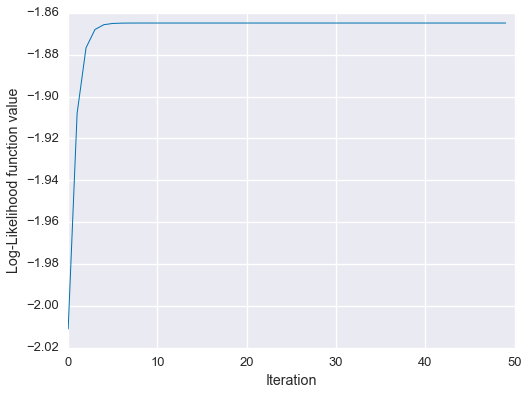

In [7]:
fig = plt.figure(figsize=(8,6))
plt.plot(Ls, linewidth=1)
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood function value')
plt.show()

So, the EM estimate matches the analytical solution, and we can see empirically that the algorithm monotonically increased the likelihood function.

Now, let's try a larger, randomly generated dataset.

Start by defining some transcripts.

In [8]:
m = 10
l_t = 100
transcripts = [''.join(np.random.choice(list('AGCT'), l_t)) for i in xrange(m)]
transcripts[:2]

['AGAGCCGTACAGACCCCATCTCGAAAGCAGAATCTTGCGGTTACTGAGGGGTAAGATAAGTAGAGTATGGCCCGGCCAGCTTAGCTGCGCATGACATGTT',
 'CGAGCGGATCTAGCATATACAAGCAGTCAGGTTTTTGAGGCAGGTGGTGAGATTCGTATACGCTTTACAGGTGCTTCCGACACGTGAGCGGTGCAGTGCA']

Next, randomly generate the true distribution $\rho_1, \ldots, \rho_m$.

<Container object of 10 artists>

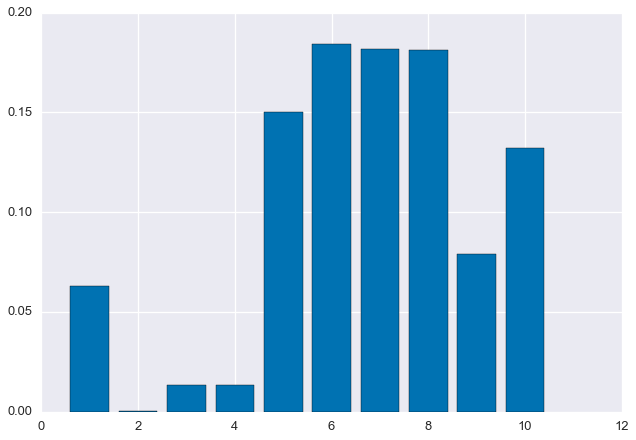

In [9]:
rho = np.random.rand(m)
rho /= sum(rho)
plt.bar(np.arange(m) + 0.6, rho, width=0.8)

We'll then pick 1000 random reads of length 5 each.

In [10]:
n = 1000 # Number of reads
l_r = 5

In [11]:
def random_read(transcripts, rho, l_r):
    chosen_seq = np.random.choice(transcripts, p=rho)
    start_idx = np.random.randint(0, len(chosen_seq) - l_r)
    end_idx = start_idx + l_r
    return chosen_seq[ start_idx:end_idx ]

In [12]:
reads = [random_read(transcripts, rho, l_r) for _ in xrange(n)]
print'First 10 reads...', reads[0:10]

First 10 reads... ['TCAGG', 'GCCTT', 'CGAAA', 'GGTGT', 'TTATT', 'GATAA', 'TTCTC', 'CTGCC', 'GCCAG', 'ATTCT']


Based on the observed data, construct the alignment matrix.

In [13]:
def find_all_alignments(transcripts, read):
    n = len(transcripts)
    tmp = np.zeros(n)
    for j in range(n):
        if read in transcripts[j]:
            tmp[j] = 1
    return tmp

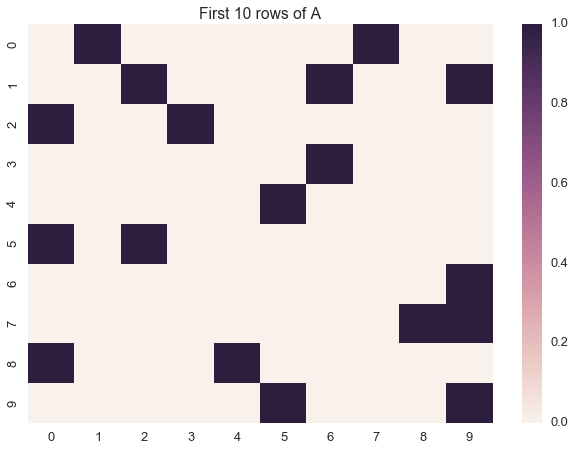

In [21]:
A = np.array([find_all_alignments(transcripts, read) for read in reads])
sns.heatmap(A[:10])
plt.title('First 10 rows of A')
plt.show()

And now, run the EM algorithm, same as before. 

In [15]:
N_iter = 100 # number of EM iterations
# Initialize the initial estimates
rho_old = [1./m] * m
Ls = np.ones(N_iter, dtype=float)

for ix in range(N_iter):
    rho_new = [(1./n) * np.sum([Pr(j, i, rho_old, A) for i in xrange(n)]) for j in xrange(m)]
    rho_old = rho_new
    Ls[ix] = log_likelihood(rho_new, A, scale=1e1000)

rho_est = rho_new

Finally, let's plot the estimated distribution next to the true distribution.

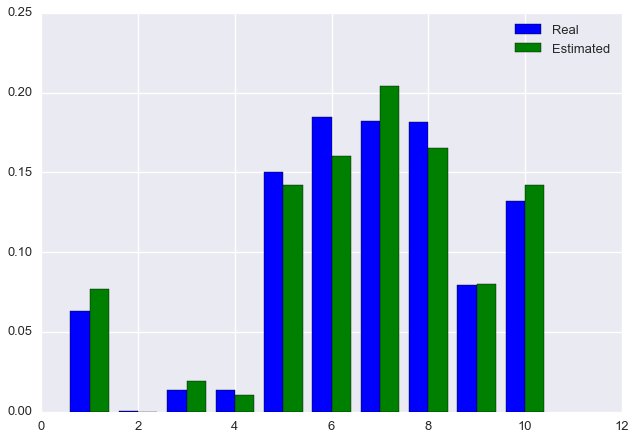

In [16]:
plt.bar(np.arange(m) + 0.6, rho, color='blue', width=0.4, label='Real')
plt.bar(np.arange(m) + 1, rho_est, color='green', width=0.4, label='Estimated')
plt.legend()
plt.show()

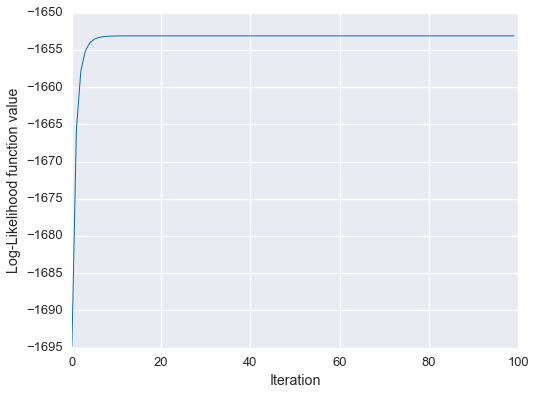

In [17]:
fig = plt.figure(figsize=(8,6))
plt.plot(Ls, linewidth=1)
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood function value')
plt.show()

We see that the algorithm has converged on approximately the correct solution!